<a href="https://colab.research.google.com/github/acaicomdados/analise-reservatorios-federais/blob/main/An%C3%A1lise%20feito%20nos%20encontros/Serie_historica_reservatorios_federais%20-%20bacia%20tocantins%201.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise séries historica

Neste notebook, seŕa feito a o cruzamento de informações entre a serie historica e informações deo reservatório, em seguida, será escolhido uma bacia hidrográfica para começar a análise

In [1]:
!pip install basedosdados

In [2]:
import numpy as np
import pandas as pd
import basedosdados as bd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [3]:
url = 'https://raw.githubusercontent.com/acaicomdados/analise-reservatorios-federais/main/Datasets/reservatorio_geral_codigo_aneel.csv'

reservatorios = pd.read_csv(url)
reservatorios.drop('Unnamed: 0',axis=1,inplace=True)
reservatorios.head()

,data,subsistema,id_empreendimento_aneel,id_reservatorio_planejamento,id_posto_vazao,reservatorio_equivalente,reservatorio,tipo_reservatorio,usina,bacia,...,volume_util,produtividade_especifica,produtividade_65_volume_util,tipo_perda,perda_carga,latitude,longitude,sistema,codigo,estado_sigla
0,2007-02-03,SUL,UHE.PH.SC.027401-1.01,9,216,SUL,CAMPOS NOVOS,RESERVATORIO COM USINA,CAMPOS NOVOS,URUGUAI,...,129.62,0.009083,1.6063,m,2.48,-27.603056,-51.323611,sin,19068,SC
1,2005-11-01,SUL,UHE.PH.RS.027556-5.01,86,215,SUL,BARRA GRANDE,RESERVATORIO COM USINA,BARRA GRANDE,URUGUAI,...,2192.66,0.009218,1.4153,m,2.79,-27.777222,-51.188611,sin,19067,SC
2,2005-11-01,SUL,UHE.PH.RS.027556-5.01,86,215,SUL,BARRA GRANDE,RESERVATORIO COM USINA,BARRA GRANDE,URUGUAI,...,2192.66,0.009218,1.4153,m,2.79,-27.777222,-51.188611,sin,19067,RS
3,2013-09-24,SUL,UHE.PH.SC.030415-8.01,89,89,SUL,GARIBALDI,RESERVATORIO COM USINA,GARIBALDI,URUGUAI,...,64.23,0.008626,0.3691,m,1.19,-27.624722,-50.983889,sin,19147,SC
4,2002-02-16,SUL,UHE.PH.SC.001356-0.01,91,217,SUL,MACHADINHO,RESERVATORIO COM USINA,MACHADINHO,URUGUAI,...,1055.81,0.009034,0.8779,m,1.48,-27.524444,-51.788889,sin,19069,SC


In [4]:
reservatorios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   data                          179 non-null    object 
 1   subsistema                    179 non-null    object 
 2   id_empreendimento_aneel       179 non-null    object 
 3   id_reservatorio_planejamento  179 non-null    int64  
 4   id_posto_vazao                179 non-null    int64  
 5   reservatorio_equivalente      179 non-null    object 
 6   reservatorio                  179 non-null    object 
 7   tipo_reservatorio             179 non-null    object 
 8   usina                         179 non-null    object 
 9   bacia                         179 non-null    object 
 10  rio                           179 non-null    object 
 11  cota_maxima                   179 non-null    float64
 12  cota_minima                   179 non-null    float64
 13  volum

In [5]:
reservatorios = reservatorios[['bacia','codigo','rio','estado_sigla']]
reservatorios.head()

,bacia,codigo,rio,estado_sigla
0,URUGUAI,19068,CANOAS,SC
1,URUGUAI,19067,PELOTAS,SC
2,URUGUAI,19067,PELOTAS,RS
3,URUGUAI,19147,CANOAS,SC
4,URUGUAI,19069,URUGUAI,SC


In [6]:
serie_reseravtorios = bd.read_table(dataset_id='br_ana_reservatorios',
table_id='sin',
billing_project_id="558244945046")

serie_reseravtorios.head()

Downloading: 100%|██████████| 1157621/1157621 [01:51<00:00, 10417.25rows/s]


,data,id_reservatorio,nome_reservatorio,cota,afluencia,defluencia,vazao_vertida,vazao_turbinada,vazao_natural,proporcao_volume_util,vazao_incremental
0,2000-01-01,19001,CAMARGOS,906.43,222.10,89.0,0.0,NaN,180.27,40.10,NaN
1,2000-01-02,19001,CAMARGOS,906.64,296.77,172.0,0.0,NaN,266.90,41.71,NaN
2,2000-01-03,19001,CAMARGOS,906.89,361.46,211.0,0.0,NaN,314.91,43.64,NaN
3,2000-01-04,19001,CAMARGOS,907.30,461.70,208.0,0.0,NaN,337.97,46.90,NaN
4,2000-01-05,19001,CAMARGOS,907.64,416.50,204.0,0.0,NaN,356.68,49.64,NaN


In [7]:
serie_reseravtorios = serie_reseravtorios[['data','id_reservatorio','nome_reservatorio','afluencia']]
serie_reseravtorios.head()

,data,id_reservatorio,nome_reservatorio,afluencia
0,2000-01-01,19001,CAMARGOS,222.10
1,2000-01-02,19001,CAMARGOS,296.77
2,2000-01-03,19001,CAMARGOS,361.46
3,2000-01-04,19001,CAMARGOS,461.70
4,2000-01-05,19001,CAMARGOS,416.50


In [8]:
reservatorios.rename(columns={'codigo':'id_reservatorio'},inplace=True)
reservatorios['id_reservatorio'] = reservatorios['id_reservatorio'].astype(str)
reservatorios.head()

,bacia,id_reservatorio,rio,estado_sigla
0,URUGUAI,19068,CANOAS,SC
1,URUGUAI,19067,PELOTAS,SC
2,URUGUAI,19067,PELOTAS,RS
3,URUGUAI,19147,CANOAS,SC
4,URUGUAI,19069,URUGUAI,SC


In [9]:
serie_reseravtorios = serie_reseravtorios.merge(reservatorios,on='id_reservatorio')
serie_reseravtorios.head()

,data,id_reservatorio,nome_reservatorio,afluencia,bacia,rio,estado_sigla
0,2000-01-01,19001,CAMARGOS,222.10,GRANDE,GRANDE,MG
1,2000-01-02,19001,CAMARGOS,296.77,GRANDE,GRANDE,MG
2,2000-01-03,19001,CAMARGOS,361.46,GRANDE,GRANDE,MG
3,2000-01-04,19001,CAMARGOS,461.70,GRANDE,GRANDE,MG
4,2000-01-05,19001,CAMARGOS,416.50,GRANDE,GRANDE,MG


In [10]:
serie_reseravtorios['bacia'].unique()

array(['GRANDE', 'PARANAIBA', 'PARANA', 'TIETE', 'PARANAPANEMA', 'IGUACU',
       'URUGUAI', 'JACUI', 'CAPIVARI', 'ITAJAI', 'PARAGUAI',
       'PARAIBA DO SUL', 'DOCE', 'ITABAPOANA', 'MUCURI', 'JEQUITINHONHA',
       'PARAGUACU', 'SAO FRANCISCO', 'TOCANTINS', 'AMAZONAS', 'ARAGUARI'],
      dtype=object)

In [11]:
serie_historica_tocantins = serie_reseravtorios[serie_reseravtorios['bacia']=='TOCANTINS']
serie_historica_tocantins.head()

,data,id_reservatorio,nome_reservatorio,afluencia,bacia,rio,estado_sigla
1122646,2000-01-01,19128,SERRA DA MESA,1570.00,TOCANTINS,TOCANTINS,GO
1122647,2000-01-02,19128,SERRA DA MESA,2070.94,TOCANTINS,TOCANTINS,GO
1122648,2000-01-03,19128,SERRA DA MESA,2927.00,TOCANTINS,TOCANTINS,GO
1122649,2000-01-06,19128,SERRA DA MESA,2379.00,TOCANTINS,TOCANTINS,GO
1122650,2000-01-09,19128,SERRA DA MESA,3050.00,TOCANTINS,TOCANTINS,GO


In [12]:
serie_historica_tocantins['nome_reservatorio'].unique()

array(['SERRA DA MESA', 'CANA BRAVA', 'SAO SALVADOR', 'PEIXE ANGICAL',
       'LAJEADO', 'ESTREITO', 'TUCURUI'], dtype=object)

In [13]:
serie_historica_tocantins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54320 entries, 1122646 to 1176965
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   data               54320 non-null  dbdate 
 1   id_reservatorio    54320 non-null  object 
 2   nome_reservatorio  54320 non-null  object 
 3   afluencia          54291 non-null  float64
 4   bacia              54320 non-null  object 
 5   rio                54320 non-null  object 
 6   estado_sigla       54320 non-null  object 
dtypes: dbdate(1), float64(1), object(5)
memory usage: 3.3+ MB


In [14]:
serie_historica_tocantins['data'] = pd.to_datetime(serie_historica_tocantins['data'])
serie_historica_tocantins.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54320 entries, 1122646 to 1176965
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   data               54320 non-null  datetime64[ns]
 1   id_reservatorio    54320 non-null  object        
 2   nome_reservatorio  54320 non-null  object        
 3   afluencia          54291 non-null  float64       
 4   bacia              54320 non-null  object        
 5   rio                54320 non-null  object        
 6   estado_sigla       54320 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(5)
memory usage: 3.3+ MB


In [15]:
px.line(serie_historica_tocantins,x='data',y='afluencia',color='nome_reservatorio',
        title='Série histórica da afluencia dos reservatórios da bacia do tocantis',
        labels={'data':'Data','afluencia':'Afluencia (m³/s)','nome_reservatorio':'Reservatorio'})

O reservatório de tucurui é o que mais apresenta vazão, se comparado com outros da mesma bacia hidrográfica, pois além do rio Tocantisn, a usina de tucurui recebe do afluente do rio araguaia, como pode ver no esquema abaixo

![tocantins](https://www.ana.gov.br/sar/sin/diagramatocantins.jpg)

Obs:
  - reservatorio com triângulo: do tipo armazenagem
  - resevatorio com circulo: do tio fio dágua

  Outra observação é que parece que se tem uma sazonalidade, principalmente um pico no periodo de março e abril

### Sobre a usina de tucurui

Usina de tucurui , pelo grafico o pico das afluencia mostrou-se menor de 2015 a 2017, e o maior pelo grafico foi em 2004

In [16]:
serie_historica_tocantins['ano'] = serie_historica_tocantins['data'].dt.year
serie_historica_tocantins['mes'] = serie_historica_tocantins['data'].dt.month

serie_historica_tocantins.head()

,data,id_reservatorio,nome_reservatorio,afluencia,bacia,rio,estado_sigla,ano,mes
1122646,2000-01-01,19128,SERRA DA MESA,1570.00,TOCANTINS,TOCANTINS,GO,2000,1
1122647,2000-01-02,19128,SERRA DA MESA,2070.94,TOCANTINS,TOCANTINS,GO,2000,1
1122648,2000-01-03,19128,SERRA DA MESA,2927.00,TOCANTINS,TOCANTINS,GO,2000,1
1122649,2000-01-06,19128,SERRA DA MESA,2379.00,TOCANTINS,TOCANTINS,GO,2000,1
1122650,2000-01-09,19128,SERRA DA MESA,3050.00,TOCANTINS,TOCANTINS,GO,2000,1


In [17]:
serie_historica_tocantins.groupby(['ano','mes','nome_reservatorio']).mean().reset_index()


,ano,mes,nome_reservatorio,afluencia
0,2000,1,CANA BRAVA,1253.116452
1,2000,1,ESTREITO,8840.619032
2,2000,1,LAJEADO,5066.993871
3,2000,1,PEIXE ANGICAL,2913.243548
4,2000,1,SAO SALVADOR,1393.486774
...,...,...,...,...
1795,2022,1,LAJEADO,14268.789091
1796,2022,1,PEIXE ANGICAL,6237.260909
1797,2022,1,SAO SALVADOR,1390.343636
1798,2022,1,SERRA DA MESA,2995.311818


<Axes: xlabel='mes', ylabel='afluencia'>

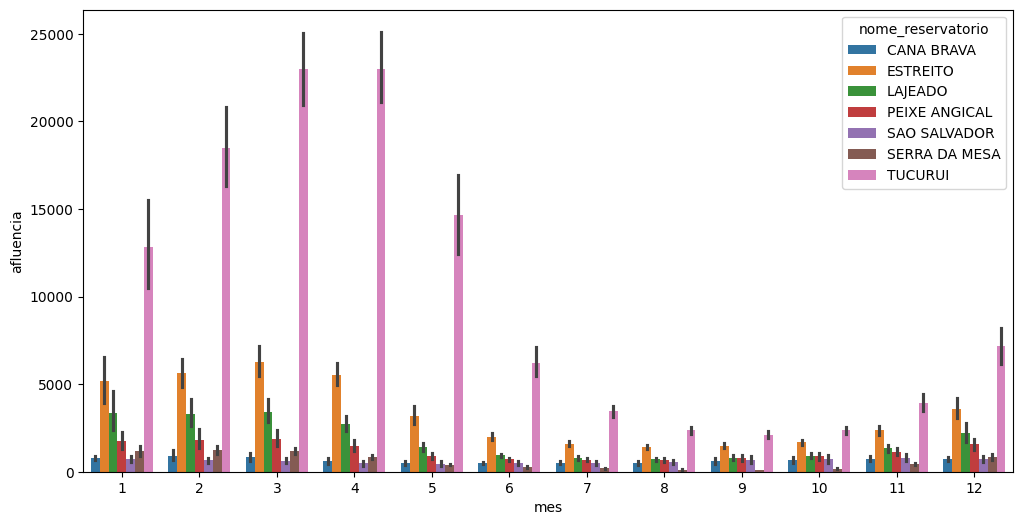

In [18]:
plt.figure(figsize=(12,6))
sns.barplot(x='mes',y='afluencia',data=serie_historica_tocantins.groupby(['ano','mes','nome_reservatorio']).mean().reset_index(),
            hue='nome_reservatorio')

tendencia de seubida até abril e começa a descrescer em maio e começa a subir em torno de novembro (a ser analisado)
 pico normalmente em março ou abril (a ser analisado a sazonalidade)

In [19]:
serie_historica_tocantins.to_csv('serie_historica_tocantins.csv')